In [11]:
import os
import numpy as np
import h5py
import pickle

from evaluation.histogram_builder import *
from evaluation.plot_utils import *

In [13]:
data_path = '/home/oliverkn/pro/data_raw'
samples = ['Wlnu','Zll','qcd','ttbar']
data_files = [os.path.join(data_path, sample+'_sample.npy') for sample in samples]
target_path = '../histograms/hlf/'

print('loading data')

x_arr = []

for data_file in data_files:
    x = np.load(data_file)
    x_arr.append(x)

loading data


In [15]:
hist_arr = []

for i, sample in enumerate(samples):
    print('building '+ sample)
    hist_builder = HistogramBuilder(settings_hlf)
    hist_builder.add_data(x_arr[i])
    hist_arr.append(hist_builder.get_histogram_data())
    
    pickle.dump(hist_arr[i], open(os.path.join(target_path, sample+'_hist.pkl'), 'wb'))

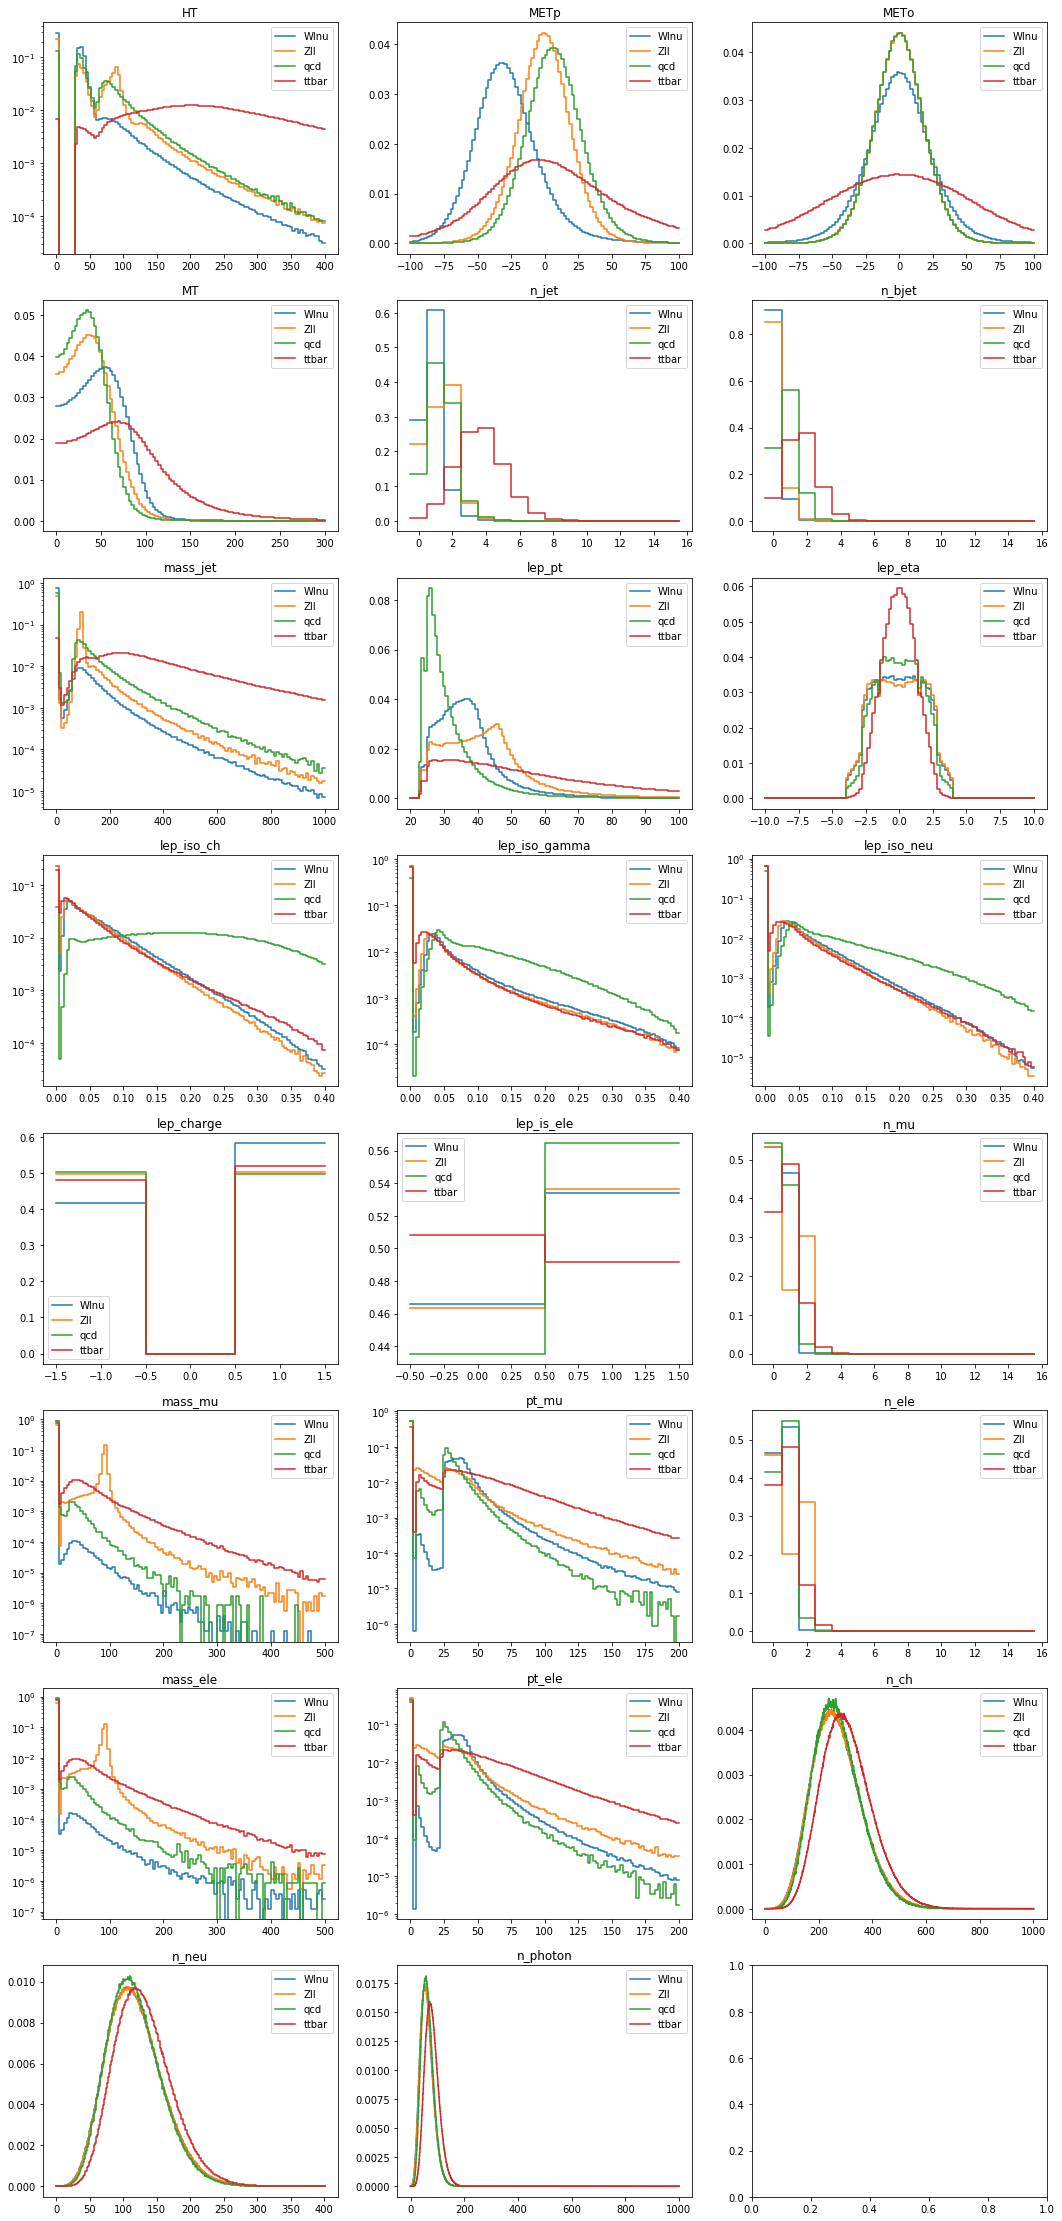

In [10]:
plot_hist(hist_arr,samples, settings_hlf)